In [2]:
import pandas as pd
import numpy as np

In [3]:
original_data = pd.read_csv(
    "data/adult.cvs",
    names=[
        "Age","Workclass","fnlwgt","Education","Education-Num","Marital Status",
        "Ocupation","Relationship","Race","Gender","Capital Gain","Capital Loss",
        "Hours Per Week","Country","Target"],
    sep=r'\s*,\s*',
    engine='python',
    na_values="?")

original_data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Ocupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours Per Week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


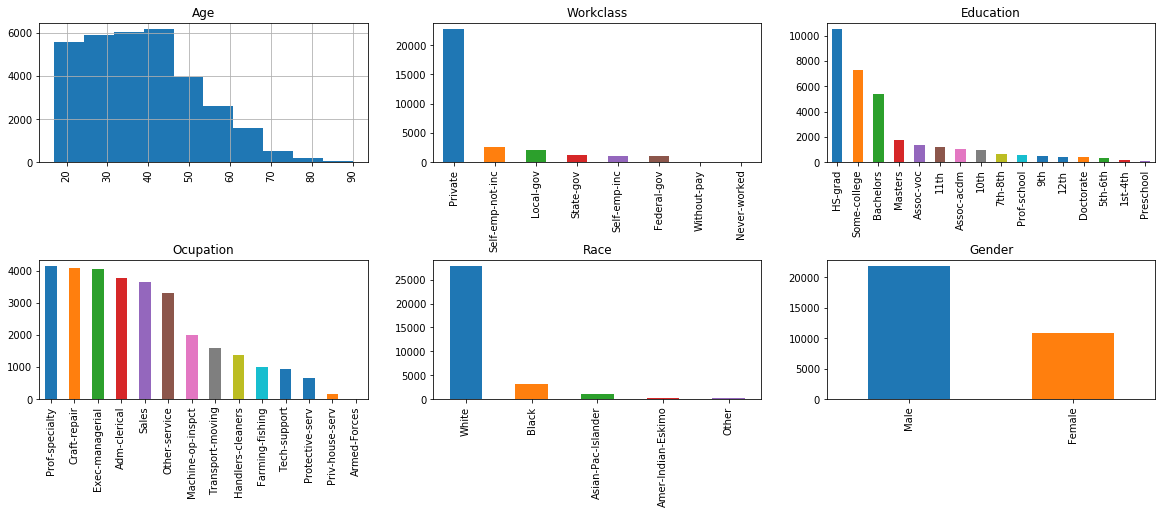

In [4]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

fig = plt.figure(figsize=(20,20))
cols = 3
rows = math.ceil(float(original_data.shape[1]) / cols)

for i, column in enumerate(['Age','Workclass','Education','Ocupation','Race','Gender']):
    ax = fig.add_subplot(rows,cols,i+1)
    ax.set_title(column)
    if original_data.dtypes[column] == np.object:
        original_data[column].value_counts().plot(kind="bar",axes=ax)
    else:
        original_data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

In [5]:
import sklearn.preprocessing as preprocessing

le = preprocessing.LabelEncoder()
original_data['Ocupation'] = le.fit_transform(original_data['Ocupation'].astype(str))
original_data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Ocupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours Per Week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,0,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,3,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,5,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,5,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,9,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
original_data['Target'] = le.fit_transform(original_data['Target'].astype(str))
original_data.tail()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Ocupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours Per Week,Country,Target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,12,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,6,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,0,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,0,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,3,Wife,White,Female,15024,0,40,United-States,1


In [7]:
original_data.Target.unique()

array([0, 1], dtype=int64)

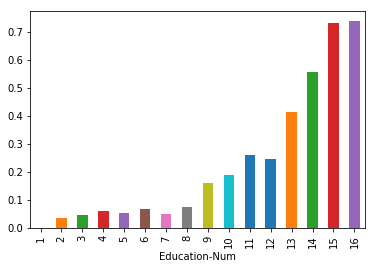

In [8]:
original_data.groupby('Education-Num').Target.mean().plot(kind='bar')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

X = original_data[['Education-Num','Ocupation']]

Y = original_data['Target']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [10]:
from sklearn.svm import SVC

classifier = SVC()

classifier.fit(x_train,y_train)

score = classifier.score(x_test,y_test)

print(score)

c:\users\owner\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7871948410870566


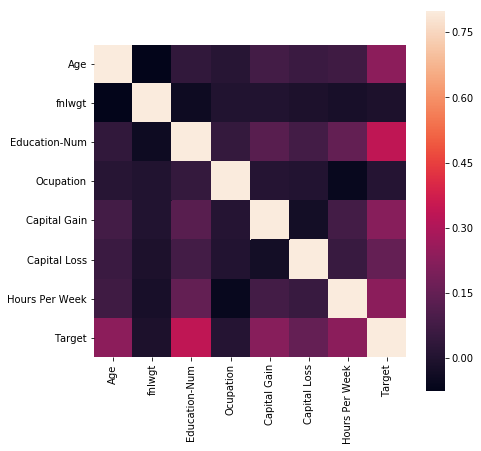

In [12]:
import seaborn as sns

corrmat = original_data.corr()
f, ax=plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,vmax=.8,square=True)
plt.show()

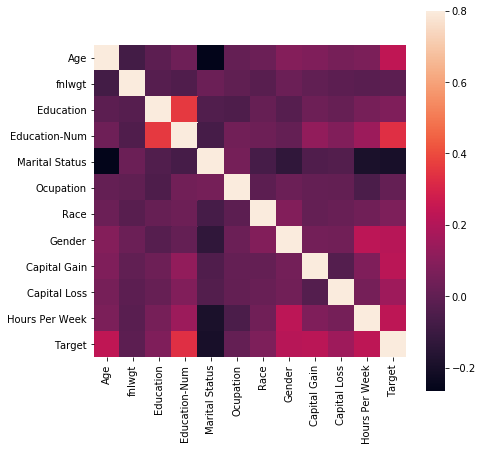

In [13]:
original_data['Race'] = le.fit_transform(original_data['Race'].astype(str))
original_data['Gender'] = le.fit_transform(original_data['Gender'].astype(str))
original_data['Marital Status'] = le.fit_transform(original_data['Marital Status'].astype(str))
original_data['Education'] = le.fit_transform(original_data['Education'].astype(str))

corrmat = original_data.corr()
f, ax=plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,vmax=.8,square=True)
plt.show()

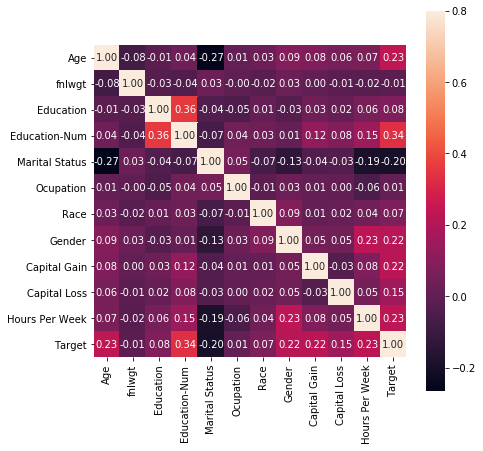

In [14]:
f, ax=plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,vmax=.8,square=True, annot=True,fmt='.2f')
plt.show()

In [16]:
X = original_data[['Education-Num','Ocupation','Age','Gender']]

Y = original_data['Target']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
classifier = SVC()

classifier.fit(x_train,y_train)

score = classifier.score(x_test,y_test)

print(score)

c:\users\owner\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.804544756640565


In [17]:
classifier = SVC(kernel='rbf',C=1.0)

classifier.fit(x_train,y_train)

score = classifier.score(x_test,y_test)

print(score)

c:\users\owner\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.804544756640565


In [18]:
classifier = SVC(kernel='rbf',C=10.0)

classifier.fit(x_train,y_train)

score = classifier.score(x_test,y_test)

print(score)

c:\users\owner\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7994779671426377


In [19]:
classifier = SVC(kernel='linear',C=1.0)

classifier.fit(x_train,y_train)

score = classifier.score(x_test,y_test)

print(score)

0.796714263780132
